# **1.Exploratory Data Analysis and Visualization**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10, 6)

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
df0 = pd.read_csv('DATASETS/gene_expression.csv')
df = df0.copy()
df.head()

,Gene One,Gene Two,Cancer Present
0,4.300,3.900,1
1,2.500,6.300,0
2,5.700,3.900,1
3,6.100,6.200,0
4,7.400,3.400,1


In [4]:
df.tail()

,Gene One,Gene Two,Cancer Present
2995,5.000,6.500,1
2996,3.400,6.600,0
2997,2.700,6.500,0
2998,3.300,5.600,0
2999,4.600,8.200,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.000,5.600,1.828,1.000,4.300,5.600,6.900,10.000
Gene Two,3000.000,5.410,1.729,1.000,4.000,5.400,6.700,10.000
Cancer Present,3000.000,0.500,0.500,0.000,0.000,0.500,1.000,1.000


In [7]:
df["Cancer Present"].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

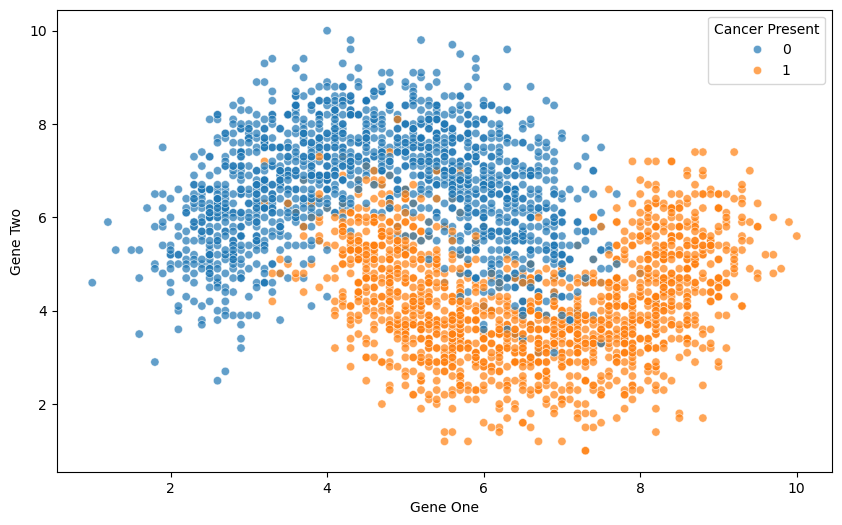

In [8]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.7);

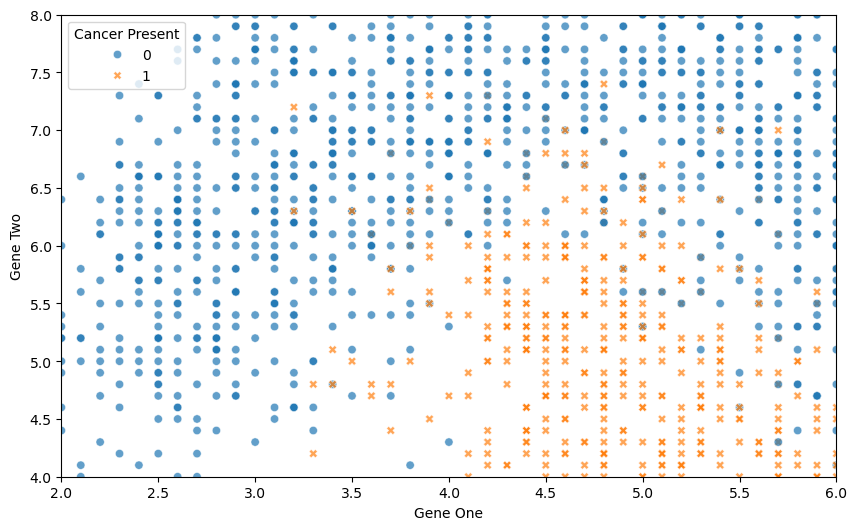

In [10]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8);

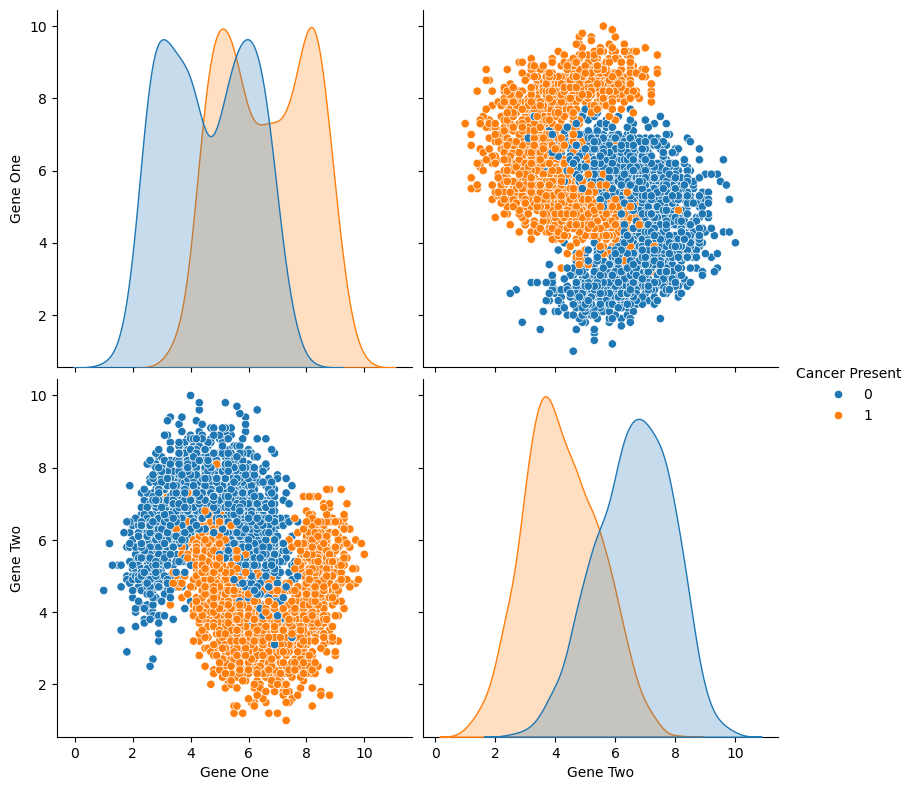

In [11]:
sns.pairplot(data = df, hue = "Cancer Present", height = 4, aspect = 1);

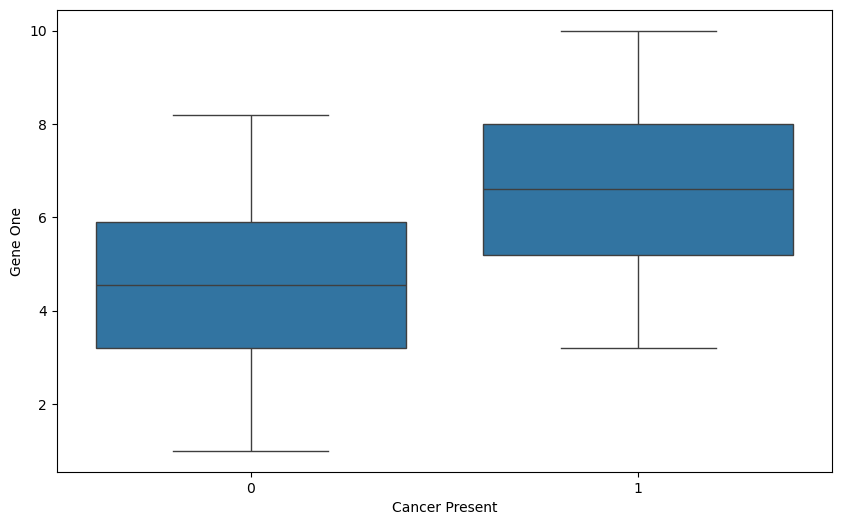

In [12]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df);

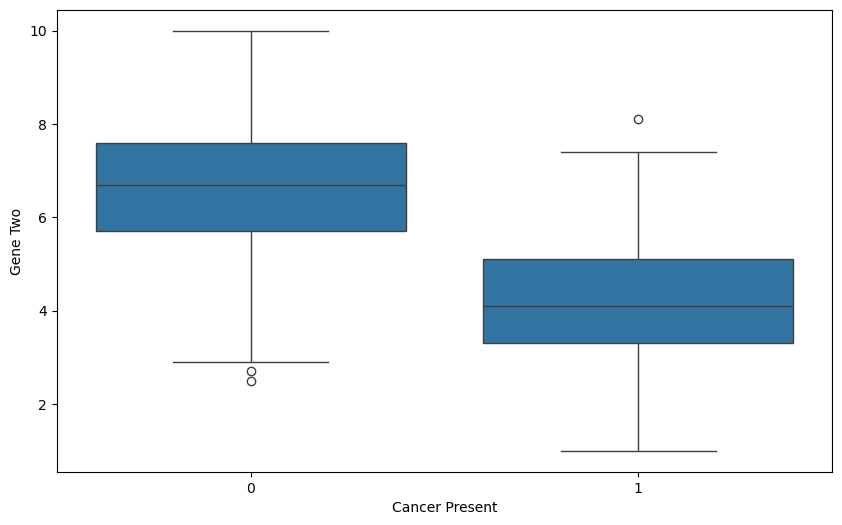

In [13]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df);

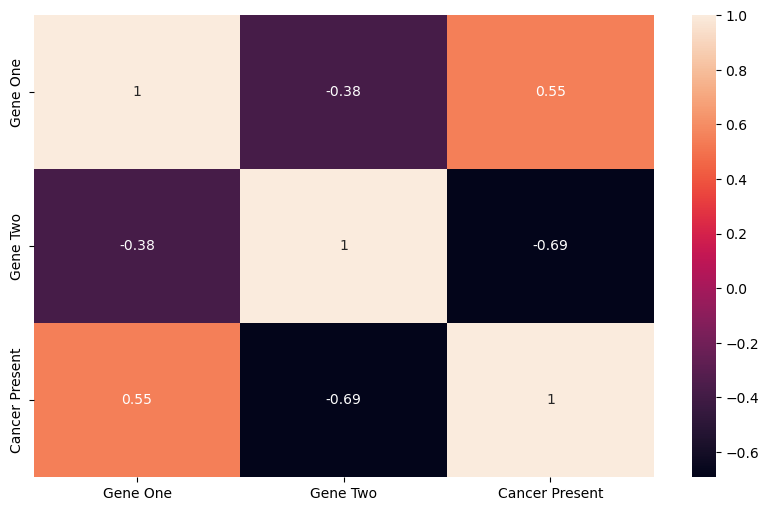

In [14]:
sns.heatmap(df.corr(), annot = True); 

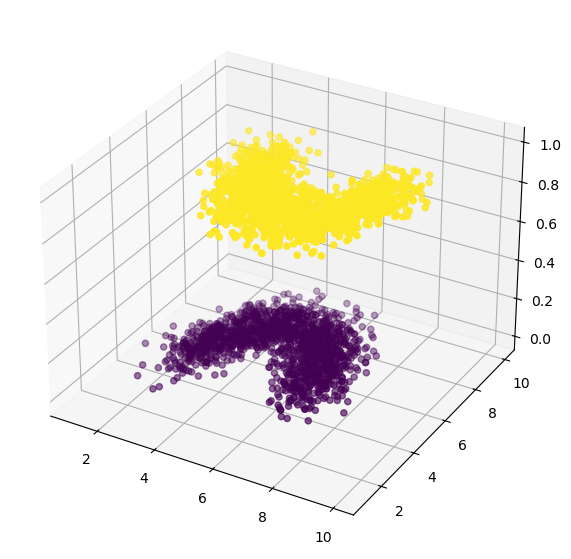

In [15]:
%matplotlib inline
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']); 

# **2. Modelling**

## 2.1. Train | Test Split

In [16]:
X = df.drop("Cancer Present", axis = 1)
y = df["Cancer Present"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2.2. Model Building

In [18]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]  #default n_neighbors=5

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [19]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [20]:
y_pred_proba = pipe_model.predict_proba(X_test)

In [21]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.000,1.000
1,0.000,1.000
2,0.000,1.000
3,1.000,0.000
4,1.000,0.000
...,...,...
895,0.400,0.600
896,1.000,0.000
897,0.000,1.000
898,0.000,1.000


In [22]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
1651,1,1,1.000,0.000
184,0,0,0.000,1.000
2407,0,0,0.000,1.000
424,0,0,0.000,1.000
1023,1,1,0.800,0.200
755,1,1,1.000,0.000
1872,0,0,0.000,1.000
2541,1,1,1.000,0.000
581,0,0,0.000,1.000
43,0,0,0.000,1.000


## 2.3. Model Performance on Classification Tasks

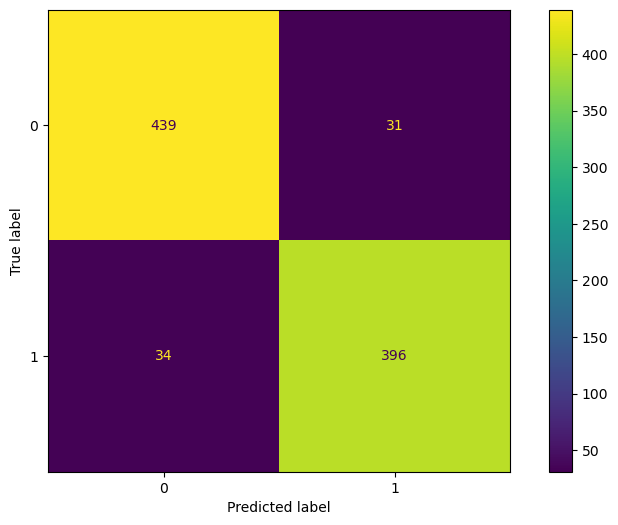

In [23]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [24]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [25]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## 2.4. Elbow Method for Choosing Reasonable K Values

In [26]:
test_error_rates = []

for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)

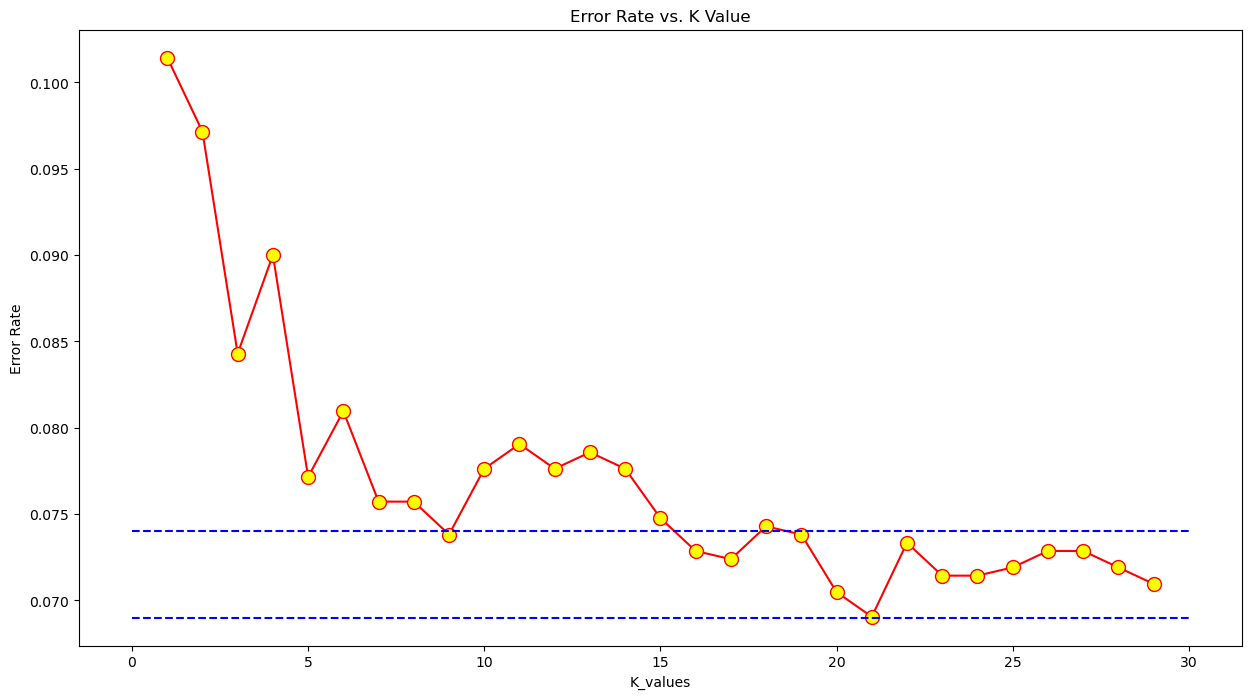

In [27]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='b', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='b', linestyles="--")

## 2.5. Overfitting and underfiting control for k values

In [28]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

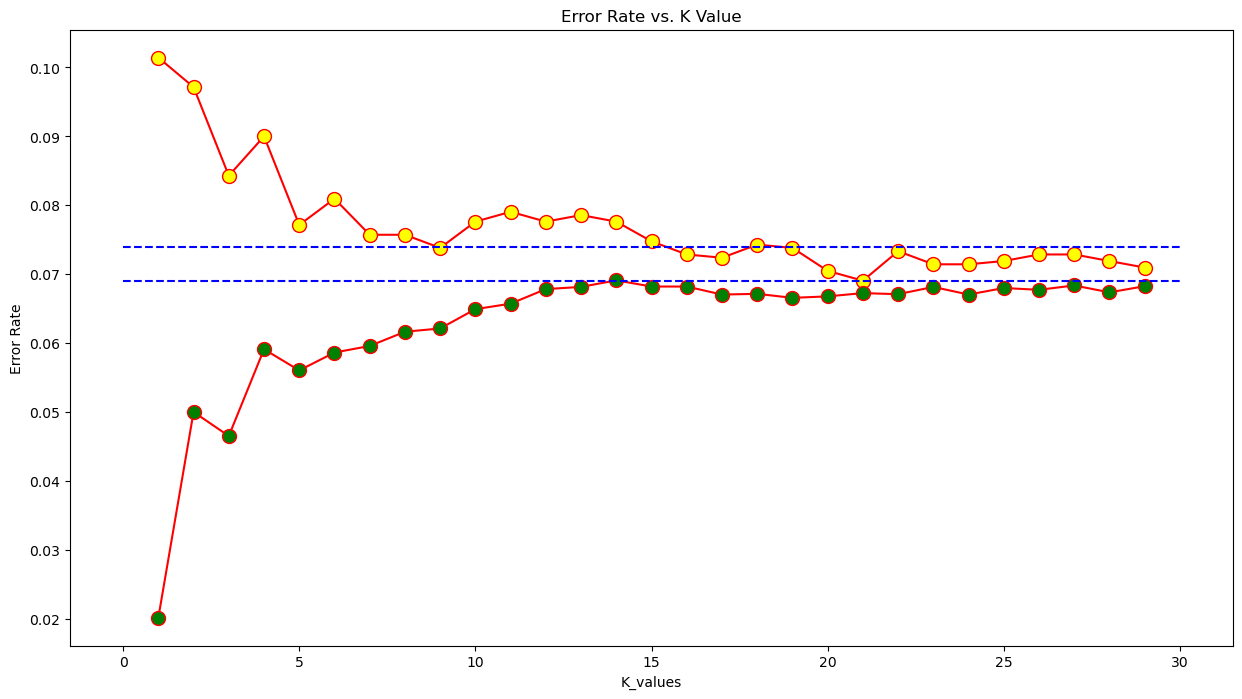

In [29]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='red', marker='o',
         markerfacecolor='yellow', markersize=10)

plt.plot(range(1,30), train_error_rates, color='red', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'b', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'b', linestyles="--")

> Yukarıdaki iki grafikten ilkinde sadece test score'larından elde edilen hata oranları yer almaktayken ikinci grafikte hem test score'larından elde edilen hem de train score'larından elde edilen hata oranları yer almaktadır. Yapacağımız K seçiminde overfitting ihitmalini göz önünde bulundurmak için bu yolu seçiyoruz.
>
> Test error'larında 2 farklı nokta göze çarpıyor. Bir tanesi K=21 diğeri ise K=9 olan noktalar. Normalde K=21 olan noktada hem en düşük hata oranı yer almaktadır hem de train setindeki hata oranı ile birbirlerine çok yakınlar. Yani overfitting için çok sağlıklı bir noktadır. Ancak K'yı 21 seçmek modelin komleksitesini aşırı artırır. Bu yüzden alternatif değer olan K=9'u seçiyoruz.
>
> K=9 için hata oranı=0.074
> 
> K=21 için hata oranı=0.069
> 
> Aradaki fark=0.005 dir. Yani göze alınabilecek bir miktar.
> 
> K=9 için test hata oranı 0.074 ve train hata oranı=0.060 dır. Yani aradaki fark 0.014 gibi çok düşük bir miktardır. 

## 2.6. Scores by Various K Values

In [30]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
knn1 = Pipeline(steps=operations)

knn1.fit(X_train, y_train)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

# 44 + 45 = 89 hata

WITH K=1

Test_Set
[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set
[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [31]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=6))]
knn6 = Pipeline(steps=operations)

knn6.fit(X_train, y_train)
print('WITH K=6\n')
eval_metric(knn6, X_train, y_train, X_test, y_test)

# 36 + 22 = 58  hata

WITH K=6

Test_Set
[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.93      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[980  50]
 [ 79 991]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1030
           1       0.95      0.93      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [32]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
knn9 = Pipeline(steps=operations)

knn9.fit(X_train, y_train)
print('WITH K=9\n')
eval_metric(knn9, X_train, y_train, X_test, y_test) 

# 28 + 24 = 52 hata

WITH K=9

Test_Set
[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [33]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=16))]
knn16 = Pipeline(steps=operations)

knn16.fit(X_train, y_train)
print('WITH K=16\n')
eval_metric(knn16, X_train, y_train, X_test, y_test) 

# 31 + 21 = 52 hata

WITH K=16

Test_Set
[[449  21]
 [ 31 399]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[960  70]
 [ 74 996]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [34]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=19))]
knn19 = Pipeline(steps=operations)

knn19.fit(X_train, y_train)
print('WITH K=19\n')
eval_metric(knn19, X_train, y_train, X_test, y_test) 

# 25 + 22 = 47 hata

WITH K=19

Test_Set
[[448  22]
 [ 25 405]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       470
           1       0.95      0.94      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 959   71]
 [  70 1000]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [35]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=22))]
knn22 = Pipeline(steps=operations)

knn22.fit(X_train, y_train)
print('WITH K=22\n')
eval_metric(knn22, X_train, y_train, X_test, y_test) 

# 28 + 18 = 46 hata

WITH K=22

Test_Set
[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [36]:
k_list = [3, 6, 9, 16, 21, 22, 23]
 
for i in k_list:
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[437  33]
 [ 33 397]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 979   51]
 [  46 1024]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1030
           1       0.95      0.96      0.95      1070

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100

WITH K=6

Test_Set
[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   mac

## 2.7. Cross Validate for Optimal K Value

In [37]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.926
train_accuracy    0.938
test_precision    0.926
train_precision   0.937
test_recall       0.931
train_recall      0.942
test_f1           0.928
train_f1          0.939
dtype: float64

## 2.8. GridSearchCV Method for Choosing Reasonable K Values

In [38]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

knn_model = Pipeline(steps=operations)

In [39]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [40]:
k_values = range(1,30)

In [41]:
param_grid = [
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

In [42]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy", return_train_score=True)

In [43]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(1, 30),
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [44]:
knn_grid_model.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__weights': 'uniform'}

In [45]:
knn_grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=20))])

In [46]:
knn_grid_model.best_index_

38

In [47]:
pd.DataFrame(knn_grid_model.cv_results_).loc[38, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.931
mean_train_score   0.934
Name: 38, dtype: object

In [48]:
print('WITH K=20\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)  # toplam 48 hata yapmış

WITH K=20

Test_Set
[[451  19]
 [ 29 401]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[964  66]
 [ 73 997]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1030
           1       0.94      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## 2.10. Evaluating ROC and AUC

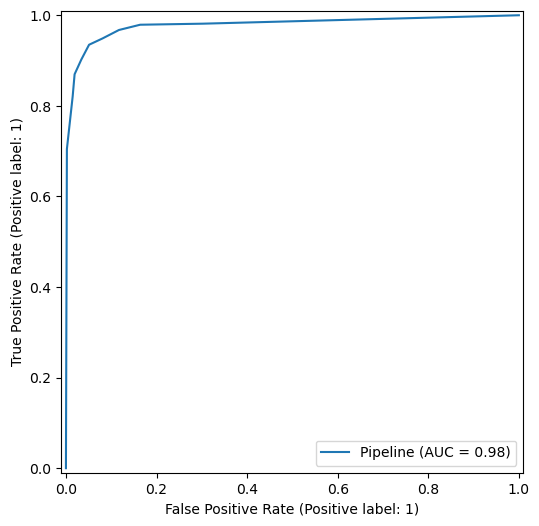

In [49]:
RocCurveDisplay.from_estimator(knn9, X_test, y_test);

In [50]:
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

# **3. Final Model and Model Deployment**

In [51]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]

final_model = Pipeline(steps=operations)

final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [52]:
import pickle

In [53]:
pickle.dump(final_model, open("knn_final_model", "wb"))

## 3.1. Predict New Observations

In [54]:
loaded_model = pickle.load(open("knn_final_model", "rb"))

In [55]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.000,5.600,1.828,1.000,4.300,5.600,6.900,10.000
Gene Two,3000.000,5.410,1.729,1.000,4.000,5.400,6.700,10.000


In [57]:
new_obs = {"Gene One": [1.1, 3.2, 4.1, 5.7, 7.2, 9.3, 2.1, 6.1],
           "Gene Two": [1.2, 4.1, 4.2, 5.4, 6.8, 10.2, 7.9, 1.1]
          }
samples= pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.100,1.200
1,3.200,4.100
2,4.100,4.200
3,5.700,5.400
4,7.200,6.800
5,9.300,10.200
6,2.100,7.900
7,6.100,1.100


In [58]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)

In [59]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.100,1.200,0,0.000,1.000
1,3.200,4.100,0,0.111,0.889
2,4.100,4.200,1,0.889,0.111
3,5.700,5.400,0,0.111,0.889
4,7.200,6.800,0,0.000,1.000
5,9.300,10.200,1,0.556,0.444
6,2.100,7.900,0,0.000,1.000
7,6.100,1.100,1,1.000,0.000
